# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

ANSWER: The advantage of showing this in an area plot is you can directly compare the levels of nitrate and phosphate to each other and compare their relative contributions. The disadvantage is that when they are stacked on top of each other, it is harder to read their individual values, espesially whichever is on top. The shaded area can also exaggerate small differences in levels. 

I would add titles, and maybe add points to each value with a line going through them. I would also add more y-axis label points. 


In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

/tmp/ipykernel_1922/2149468501.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

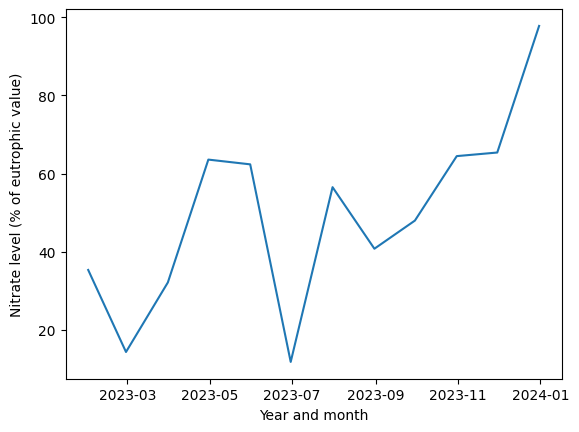

In [2]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

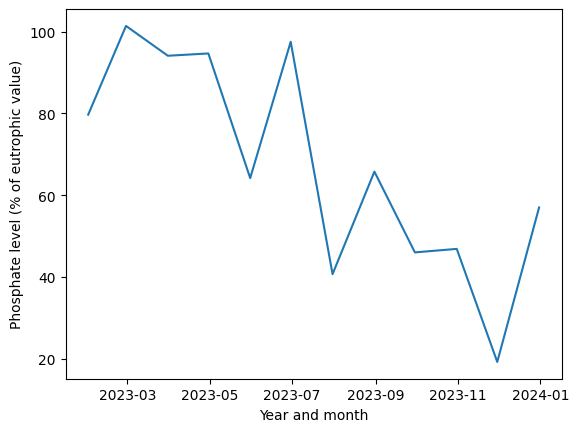

In [5]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

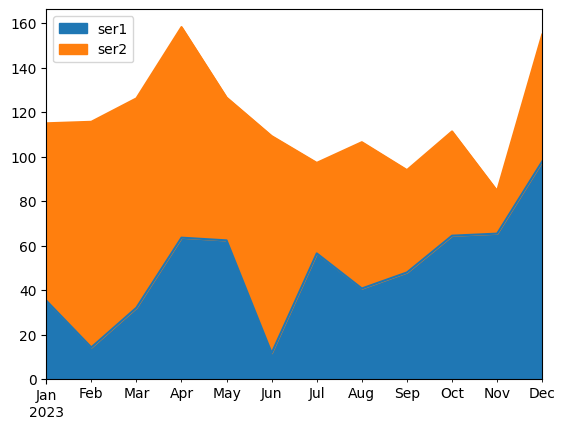

In [6]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

In [2]:
#1
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

#2
df_heart = pd.read_csv("heart_disease.csv")

#3
df_cc = pd.read_csv("colorectal_cancer_dataset.csv")

DATASET 1: Diabetes Health Indicators

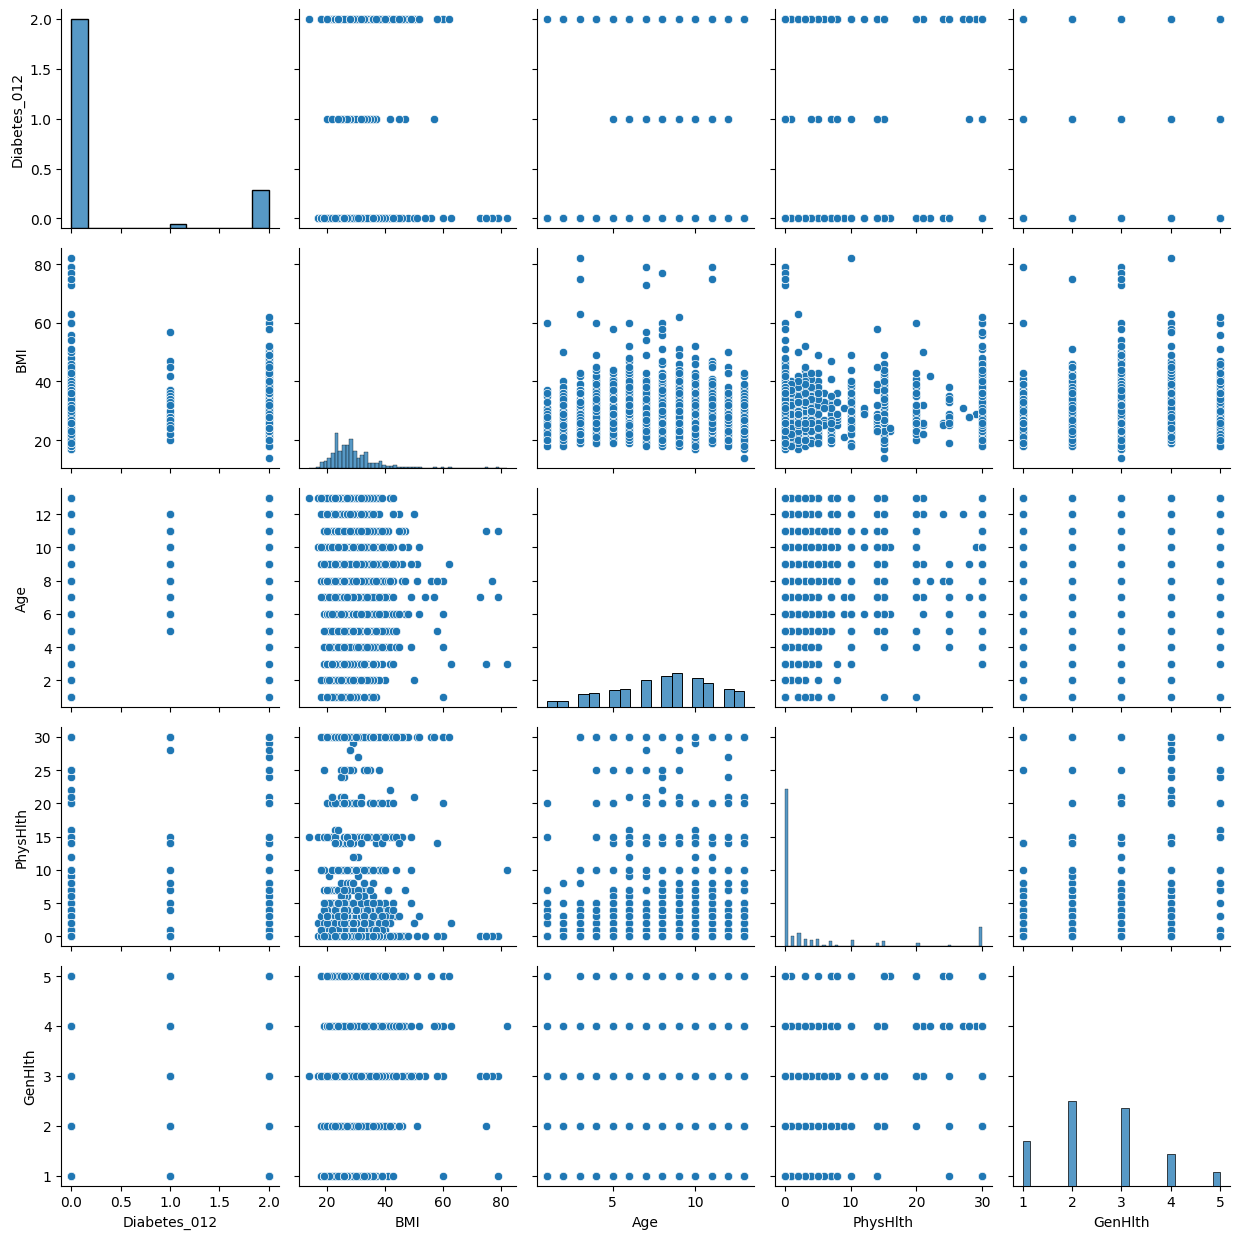

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

df_sample = df.sample(n=2000, random_state=1)

correlation_columns = ['Diabetes_012', 'BMI', 'Age', 'PhysHlth', 'GenHlth']

sns.pairplot(df_sample[correlation_columns])
plt.tight_layout()
plt.show()

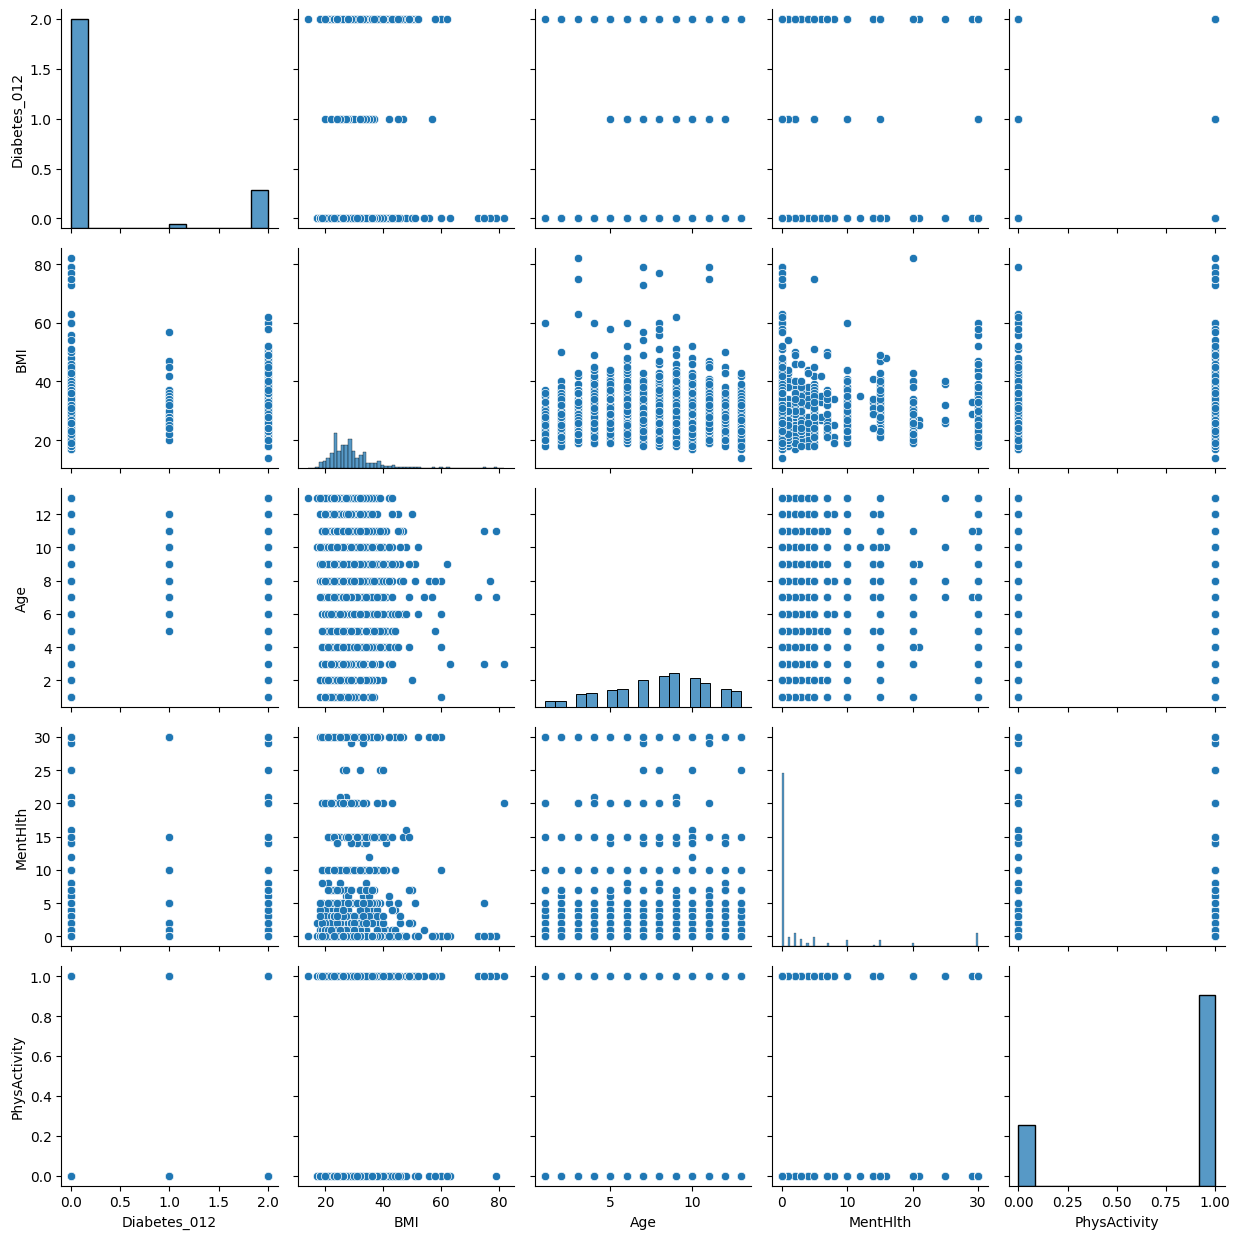

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

df_sample2 = df.sample(n=2000, random_state=1)

correlation_columns2 = ['Diabetes_012', 'BMI', 'Age', 'MentHlth', 'PhysActivity']

sns.pairplot(df_sample[correlation_columns2])
plt.tight_layout()
plt.show()

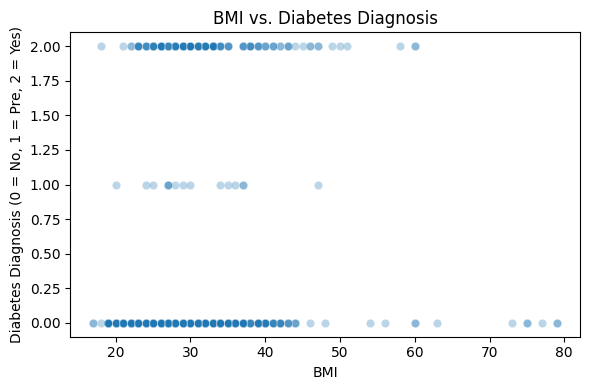

In [10]:
df_sample = df.sample(n=1000, random_state=1)

# Scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_sample, x='BMI', y='Diabetes_012', alpha=0.3)

plt.title("BMI vs. Diabetes Diagnosis")
plt.xlabel("BMI")
plt.ylabel("Diabetes Diagnosis (0 = No, 1 = Pre, 2 = Yes)")
plt.tight_layout()
plt.show()

In [11]:
correlation = df[['BMI', 'Diabetes_012']].corr().iloc[0, 1]
print(f"Correlation between BMI and Diabetes_012: {correlation:.3f}")

Correlation between BMI and Diabetes_012: 0.224


Correlation between Age and Diabetes Diagnosis: 0.185


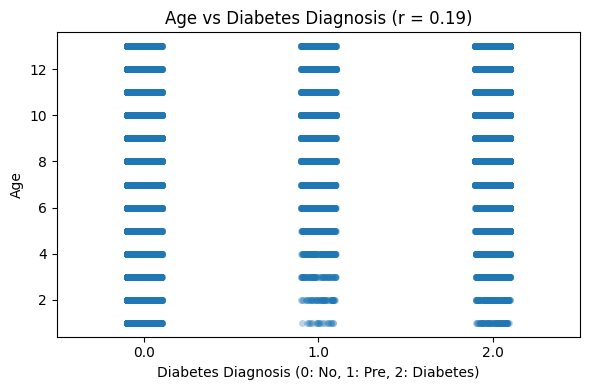

In [12]:
# age vs. diabetes

corr_age = df[['Age', 'Diabetes_012']].corr().iloc[0, 1]
print(f"Correlation between Age and Diabetes Diagnosis: {corr_age:.3f}")

# Plot
plt.figure(figsize=(6, 4))
sns.stripplot(data=df, x='Diabetes_012', y='Age', jitter=True, alpha=0.3)
plt.title(f"Age vs Diabetes Diagnosis (r = {corr_age:.2f})")
plt.xlabel("Diabetes Diagnosis (0: No, 1: Pre, 2: Diabetes)")
plt.ylabel("Age")
plt.tight_layout()
plt.show()

Correlation between PhysHlth and Diabetes Diagnosis: 0.176


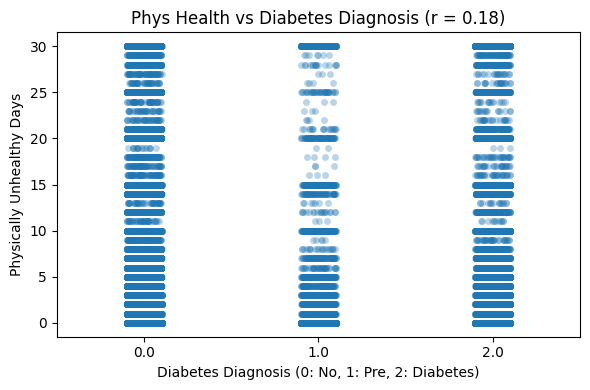

In [14]:
# physical health and diabetes

# Calculate correlation
corr_phys = df[['PhysHlth', 'Diabetes_012']].corr().iloc[0, 1]
print(f"Correlation between PhysHlth and Diabetes Diagnosis: {corr_phys:.3f}")

# Plot
plt.figure(figsize=(6, 4))
sns.stripplot(data=df, x='Diabetes_012', y='PhysHlth', jitter=True, alpha=0.3)
plt.title(f"Phys Health vs Diabetes Diagnosis (r = {corr_phys:.2f})")
plt.xlabel("Diabetes Diagnosis (0: No, 1: Pre, 2: Diabetes)")
plt.ylabel("Physically Unhealthy Days")
plt.tight_layout()
plt.show()

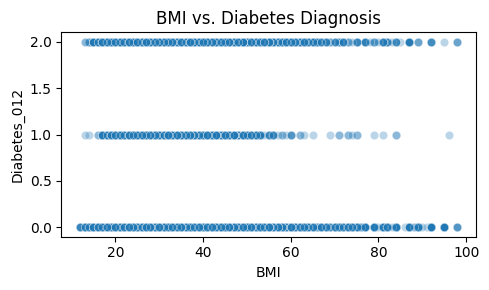

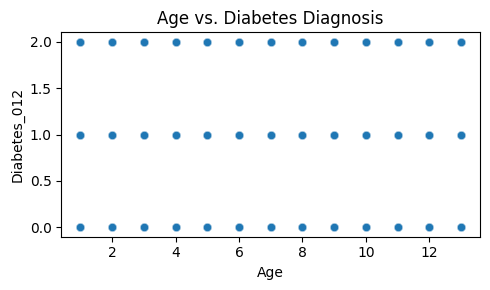

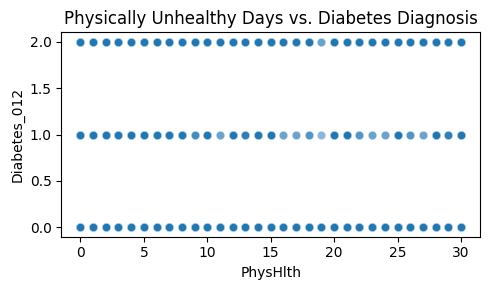

In [8]:
# correlations between pairs of variables


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))

# 1. BMI vs. Diabetes
sns.scatterplot(data=df, x='BMI', y='Diabetes_012', alpha=0.3)
plt.title("BMI vs. Diabetes Diagnosis")
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 3))

# 2. Age vs. Diabetes
sns.scatterplot(data=df, x='Age', y='Diabetes_012', alpha=0.3)
plt.title("Age vs. Diabetes Diagnosis")
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 3))

# 3. PhysHlth vs. Diabetes
sns.scatterplot(data=df, x='PhysHlth', y='Diabetes_012', alpha=0.3)
plt.title("Physically Unhealthy Days vs. Diabetes Diagnosis")
plt.tight_layout()
plt.show()


CONCLUSIONS:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!
    - The data is what I expect although the trends are not very clear. Since most columns are categorical, it's hard to visualize continous correlations. But there is a correlation between BMI and diabetes as we would expect. 


- Do you see any outliers?  (Data points that are far from the rest of the data).
    - Yes, BMI has some unusually high values above 60. Age and general health have some skewness suggesting outliers as well. 


- Are any data items highly correlated with each other, suggesting that they are redundant?
    - no 

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?
    - N/A

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)
    - Age and income could be confounding variables both affecting diabetes separate from other health indicators
    - I am very surprised and dissapointed that fasting blood glucose isn't in the dataset becuase diabetes is a blood sugar disorder. It would also be helpful to know if they have genetic daibetes or lifestyle induced diabetes (type 1 or 2).




DATASET 2: Heart Disease 

In [3]:
df_heart.select_dtypes(include='number').columns

Index(['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Sleep Hours',
       'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level',
       'Homocysteine Level'],
      dtype='object')

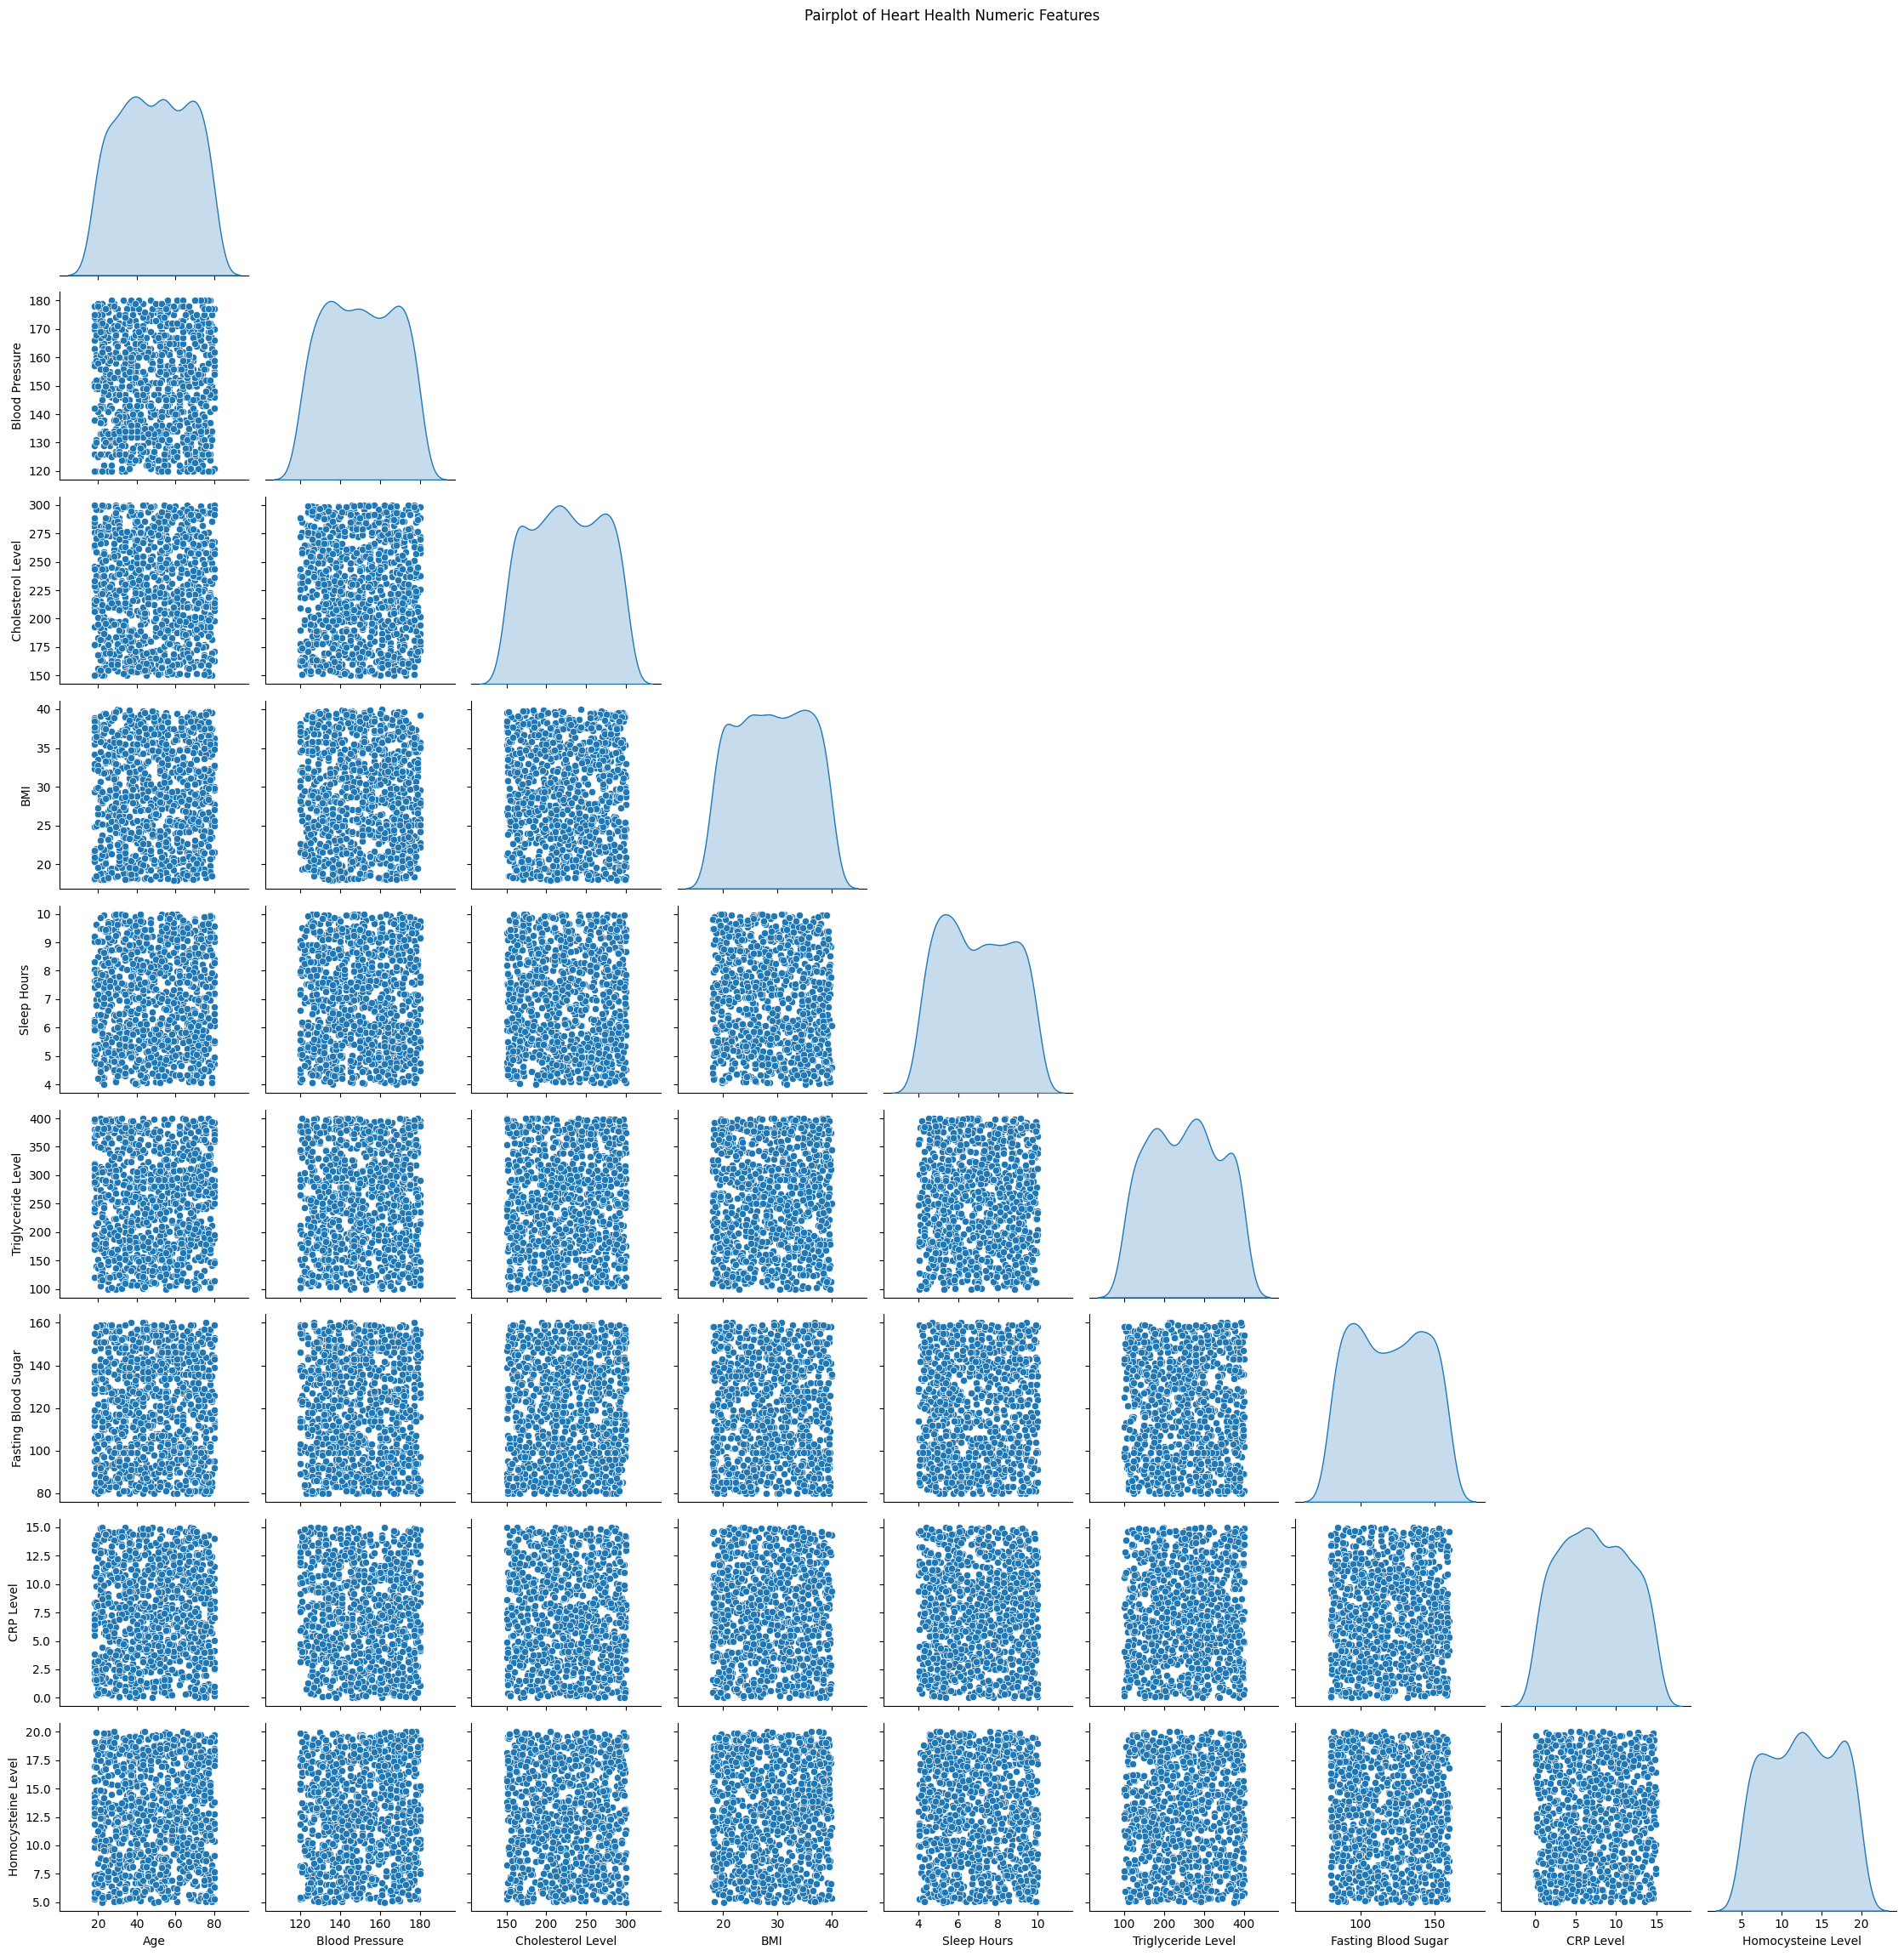

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_cols = df_heart.select_dtypes(include='number').columns

# Drop rows with missing values in those columns
df_heart_clean = df_heart[numeric_cols].dropna()

# Optional: sample for speed
df_sample = df_heart_clean.sample(n=1000, random_state=1)

# Pairplot
sns.pairplot(df_sample, corner=True, diag_kind='kde')
plt.suptitle("Pairplot of Heart Health Numeric Features", y=1.02)
plt.tight_layout()
plt.show()

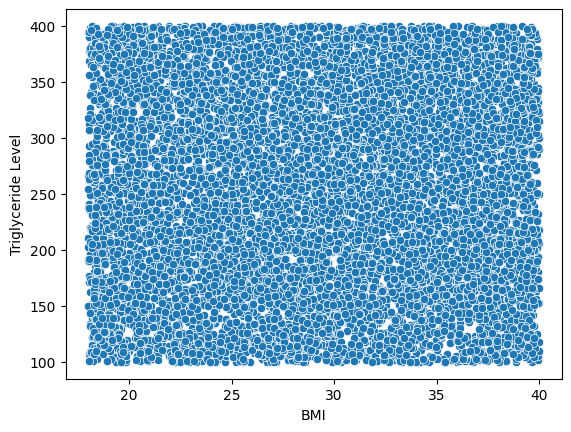

In [5]:
sns.scatterplot(data=df_heart, x='BMI', y='Triglyceride Level')
plt.show()

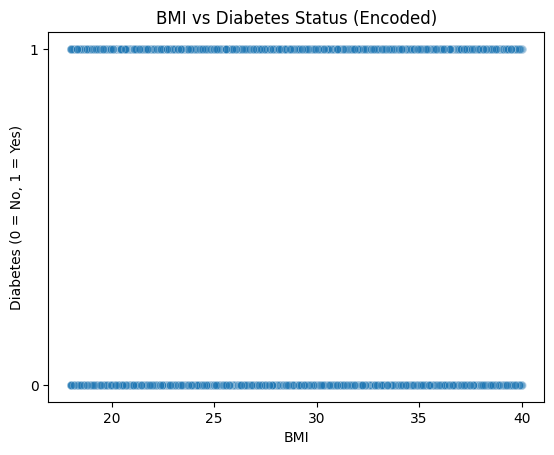

In [9]:
df_heart['Diabetes_Encoded'] = df_heart['Diabetes'].map({'No': 0, 'Yes': 1})
df_plot = df_heart[['BMI', 'Diabetes_Encoded']].dropna()

sns.scatterplot(data=df_plot, x='BMI', y='Diabetes_Encoded', alpha=0.3)
plt.title("BMI vs Diabetes Status (Encoded)")
plt.xlabel("BMI")
plt.ylabel("Diabetes (0 = No, 1 = Yes)")
plt.yticks([0, 1])
plt.show()

Conclusions Dataset 2:


- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!
    - This dataset appears to be artificially generated becuase there are no correlations between variables and the data is uniformly distributed. 


- Do you see any outliers?  (Data points that are far from the rest of the data).
    - no 


- Are any data items highly correlated with each other, suggesting that they are redundant?
    - no 


- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?
    - N/A

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)
    - N/A


DATASET 3: Colorectal Cancer Global Dataset

In [18]:
# makeing a dataframe with just the columns related to diabetes

selected_columns = [
    'Country',
    'Age',
    'Gender',
    'Smoking_History',
    'Alcohol_Consumption',
    'Obesity_BMI',
    'Diet_Risk',
    'Physical_Activity',
    'Diabetes',
    'Inflammatory_Bowel_Disease',
    'Urban_or_Rural',
    'Economic_Classification',
    'Healthcare_Access',
    'Insurance_Status'
]

df_cc_diabetes = df_cc[selected_columns].copy()
df_cc_diabetes.head

<bound method NDFrame.head of        Country  Age Gender Smoking_History Alcohol_Consumption  Obesity_BMI  \
0           UK   77      M              No                 Yes          NaN   
1           UK   59      M              No                  No          NaN   
2        Japan   66      M             Yes                  No          NaN   
3          USA   83      M              No                  No          NaN   
4       France   66      M             Yes                  No          NaN   
...        ...  ...    ...             ...                 ...          ...   
167492     USA   69      M             Yes                  No          NaN   
167493     USA   79      F             Yes                 Yes          NaN   
167494     USA   74      M             Yes                 Yes          NaN   
167495      UK   68      F             Yes                 Yes          NaN   
167496  France   79      F              No                  No          NaN   

       Diet_Risk Phys

CONCLUSIONS Dataset 3:

Since almost all of the useful columns in this dataset are categorical, scatterplots are not an informative visualization tool. I tried to encode the diabetes and BMI columns but the data is not clean and I ran into a lot of trouble and got stuck.

Visualizations from week 4, such as histograms and bar graphs, are better suited for this type of data.  

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

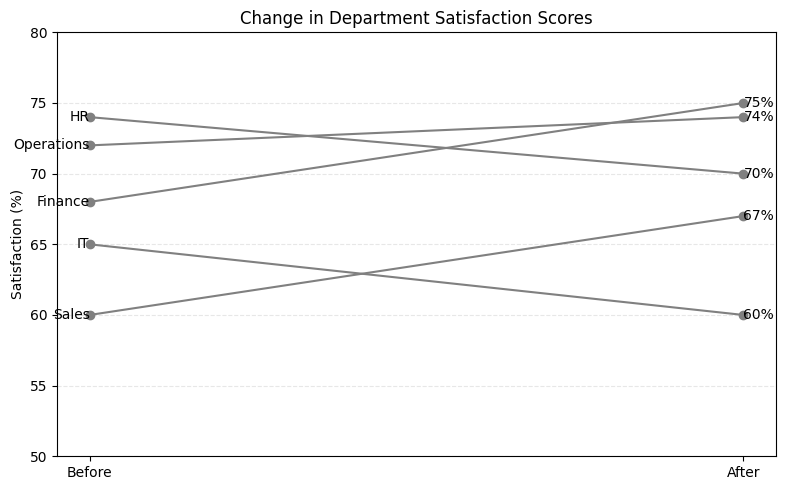

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Simulated data
data = {
    'Category': ['Finance', 'HR', 'Sales', 'IT', 'Operations'],
    'Before': [68, 74, 60, 65, 72],
    'After':  [75, 70, 67, 60, 74]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(8, 5))

for _, row in df.iterrows():
    plt.plot(['Before', 'After'], [row['Before'], row['After']], marker='o', color='gray')
    plt.text('Before', row['Before'], f"{row['Category']}", ha='right', va='center')
    plt.text('After', row['After'], f"{row['After']}%", ha='left', va='center')

# Format
plt.title("Change in Department Satisfaction Scores")
plt.ylabel("Satisfaction (%)")
plt.xticks(['Before', 'After'])
plt.ylim(50, 80)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()